<h1 align=center>Assignment  69: Ensemble Techniques 5</h1>

# Question 1 : You are working on machine learning project where you have containing numerical and categorical features. You have identified that some features are highly correlated and there are missing values in some of the columns. You want to build a pipeline that automates feature engineering process and handles missing values.

### Design a Pipeline that includes following steps:
* Use an automated method to identify important features of dataset 
* Use a numerical pipeline that includes following steps:
    * Impute missing values in numeric columns with mean
    * Scale the numerical columns using standardisation
* Create a categorical pipeline that includes following steps:
    * Impute missing values in categorical columns with most frequent data
    * One Hot Encode the categorical columns
* Combine the numerical and categorical pipelines using a ColumnTransformer
* Use Random Forest Classifier to build final model
* Evaluate accuracy of model on the test dataset

### Note : Your Solution should include code snippets for each step of pipeline and a brief explaination of each step. You should also provide an interpretation of results and suggest possible improvements for pipeline

## Answer :

### Used Employee Attrition dataset for performing above tasks
Dataset link : [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/)

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

#### Read the Dataset

In [18]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv("./Attrition.csv")
df.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Checking the Basic info of dataset

In [2]:
# Checking the Shape of the Dataset
df.shape

(1470, 35)

In [3]:
# Checking the info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking the Null values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Their is no Missing Values in the Dataset

## Seperate the X And Y Values

In [6]:
X = df.drop(labels=['Attrition'],axis=1)
y = df['Attrition']

In [7]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [11]:
y = y.map({'Yes':1, 'No':0})

In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### Seperating categorical and continious features from X(Independent features)

In [23]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

In [24]:
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [27]:
num_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Feature Selection For Numerical Column

In [28]:
X_num = X[num_cols]
X_num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [29]:
from sklearn.feature_selection import f_classif, SelectKBest

kbest_num = SelectKBest(f_classif,k=10)

X_num = X[num_cols]

kbest_num.fit_transform(X_num,y)

selected_con_features = list(X_num.columns[kbest_num.get_support()])
selected_con_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

## Feature Selection For Catagorical Column And Ordinal Encoding

In [30]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X_cat = X[cat_cols]
Xcat_encoded = pd.DataFrame(oe.fit_transform(X_cat), columns=oe.get_feature_names_out())

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

kbest_cat = SelectKBest(chi2,k=5)

kbest_cat.fit_transform(Xcat_encoded,y)

selected_cat_features = list(Xcat_encoded.columns[kbest_cat.get_support()])
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [33]:
sel_features = selected_cat_features + selected_con_features
sel_features

['Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

#### This all are the selected features from the dataset

In [34]:
X_selected = X[sel_features]
X_selected.head()

,Department,EducationField,JobRole,MaritalStatus,OverTime,Age,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,Sales,Life Sciences,Sales Executive,Single,Yes,41,3,2,4,5993,0,8,6,4,5
1,Research & Development,Life Sciences,Research Scientist,Married,No,49,2,2,2,5130,1,10,10,7,7
2,Research & Development,Other,Laboratory Technician,Single,Yes,37,2,1,3,2090,0,7,0,0,0
3,Research & Development,Life Sciences,Research Scientist,Married,Yes,33,3,1,3,2909,0,8,8,7,0
4,Research & Development,Medical,Laboratory Technician,Married,No,27,3,1,2,3468,1,6,2,2,2


### Feature Selection is completed

In [35]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [36]:
Xtrain.shape, ytrain.shape

((1176, 34), (1176,))

In [37]:
Xtest.shape, ytest.shape

((294, 34), (294,))

 # Creating a Numerical and Categorical Pipeline

* Numerical pipeline includes following steps:
    * Impute missing values in numeric columns with mean
    * Scale the numerical columns using standardisation

In [38]:
## Import the Required Library
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
num_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('schaler',StandardScaler())
])

* Categorical pipeline includes following steps:
    * Impute missing values in categorical columns with most frequent data
    * One Hot Encode the categorical columns

In [41]:
cat_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder())
])

* Combine the Numerical and Categorical pipelines using a ColumnTransformer

In [42]:
preproesor = ColumnTransformer([
    ('num_pipe',num_pipe, selected_con_features),
    ('cat_pipe',cat_pipe,selected_cat_features)
])

### Transform the dataset with ColumnTransformer

In [44]:
Xtrain_scaled = preproesor.fit_transform(Xtrain)

In [45]:
Xtest_scaled = preproesor.transform(Xtest)

# Traning the Randomforest Classifer

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=21)

In [47]:
rfc.fit(Xtrain_scaled,ytrain)

RandomForestClassifier(max_depth=8, random_state=21)

In [48]:
ypred = rfc.predict(Xtest_scaled)

In [55]:
from sklearn.metrics import accuracy_score,classification_report

print(f"Accuracy Score: {accuracy_score(ypred,ytest)*100 : .4f}")
print("\n------------------------------------------------------------------------\n")
print(f"Calssifacion Report :\n {classification_report(ypred,ytest)}")

Accuracy Score:  87.0748

------------------------------------------------------------------------

Calssifacion Report :
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       283
           1       0.15      0.55      0.24        11

    accuracy                           0.87       294
   macro avg       0.57      0.71      0.58       294
weighted avg       0.95      0.87      0.90       294



<Axes: >

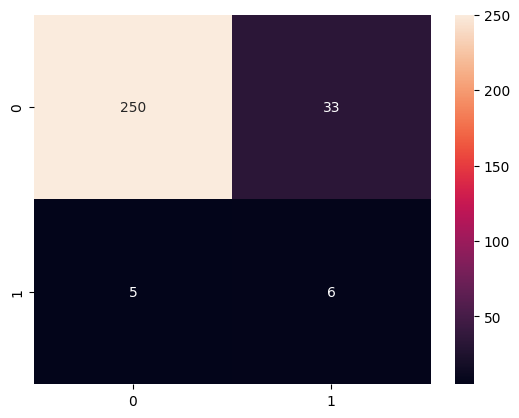

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cf = confusion_matrix(ypred,ytest)
sns.heatmap(cf, annot=True,fmt='d')

### Insights
1. Above model has Accuracy of 87.0748 on testing data
2. However above data has imbalance data on target
3. To deal with imbalanced techniques such as SMOTE (Synthetic Minority Oversampling TEchnique)
4. Feature selection can also be avoided in above data and performance should be checked with all features as well

# Question 2 : Build a pipeline that includes random forest classifier and a logistic regression classifier , and then voting classifier to combine their predictions. Train the pipeline on iris dataset and evaluate its accuracy

## Answer :

In [69]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)

In [70]:
X.shape

(150, 4)

In [71]:
y.shape

(150,)

### Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=42)

In [86]:
Xtrain.shape, ytrain.shape

((105, 4), (105,))

In [87]:
Xtest.shape, ytest.shape

((45, 4), (45,))

In [88]:
### Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### Create pipeline

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

## Define the Base Model
rfc = RandomForestClassifier(n_estimators=100, max_depth=4)
lr = LogisticRegression(C=1.0)

## Voting Classifer
vc =VotingClassifier(estimators=[('rfc',rfc),
                                ('lr',lr)],voting='soft')

In [91]:
vc.fit(Xtrain_scaled,ytrain)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(max_depth=4)),
                             ('lr', LogisticRegression())],
                 voting='soft')

### Predicting the test results

In [92]:
ypred = vc.predict(Xtest_scaled)

In [93]:
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Evaluating the model on test data

<Axes: >

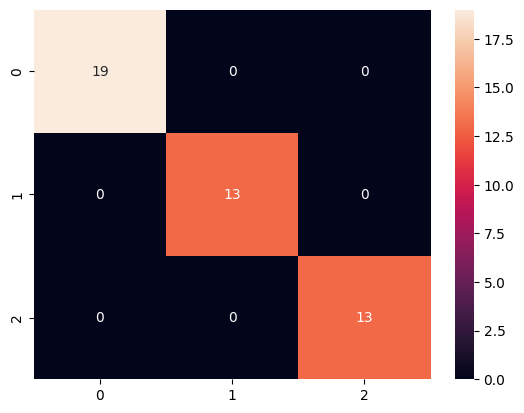

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred)
sns.heatmap(cf,annot=True,fmt='d')

In [96]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [97]:
# Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypred)
print(f'Accuracy on Final Voting Classifier model is {acc*100:.2f}%')

Accuracy on Final Voting Classifier model is 100.00%
